In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Sequence modelling 

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [2]:
# Import imdb

import tensorflow.keras.datasets.imdb as imdb

In [4]:
# Download and assign the data set using load_data()

(x_train, y_train),(x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [5]:
# Inspect the type of the data
type(x_train)


numpy.ndarray

In [7]:
# Inspect the shape of the data

x_train.shape

(25000,)

In [8]:
# Display the first dataset element input
# Notice encoding

x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [9]:
# Display the first dataset element output

y_train[0]

1

#### Load dataset with different options

In [ ]:
# Load the dataset with defaults
imdb.load_data(path='imdb.npz',index_from =3)

# ~/.keras/dataset/

In [10]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_data(num_words = 1000)

((array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 

In [12]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_data(skip_top=10, num_words=1000, oov_char=2)

((array([list([2, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 2, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2, 19, 14, 22, 2, 2, 2, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 2, 22, 17, 515, 17, 12, 16, 626, 18, 2, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2, 2, 16, 480, 66, 2, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 2, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 2, 2, 2, 107, 117, 2, 15, 256, 2, 2, 2, 2, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 2, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2, 56, 26, 141, 2, 194, 2, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 2, 88, 12, 16, 283, 2, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([2, 194, 2, 194, 2, 78, 228, 2, 2, 2, 2, 2, 134, 26, 2, 715, 2, 118, 2, 14, 394, 20, 13, 119, 954, 

In [13]:
# Limit the sequence lengths to 500 using maxlen

imdb.load_data(maxlen=500)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [14]:
# Use '1' as the character that indicates the start of a sequence

imdb.load_data(start_char=1) 

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

#### Explore the dataset word index

In [15]:
# Load the imdb word index using get_word_index()

imdb_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [16]:
# View the word index as a dictionary,
# accounting for index_from.

index_from =3
imdb_word_index = {key: value + index_from for key , value in imdb_word_index.items()}

In [17]:
# Retrieve a specific word's index
imdb_word_index['simpsonian']


52256

In [18]:
# View an input sentence

imdb_word_index['the']

4

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [30]:
# Load the imdb data set
import tensorflow.keras.datasets.imdb as imdb

(x_train, y_train),(x_test, y_test)= imdb.load_data()


#### Preprocess the data with padding

In [31]:
# Inspect the input data shape

x_train.shape

(25000,)

In [32]:
# Pad the inputs to the maximum length using maxlen
padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300, padding='post', truncating='post')


In [33]:
# Inspect the output data shape
padded_x_train.shape


(25000, 300)

#### Create a Masking layer

In [34]:
# Import numpy 

import numpy as np

In [35]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train,-1)

In [36]:
# Create a Masking layer 

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value = 0.0 )

In [37]:
# Pass tf_x_train to it
masked_x_train = masking_layer(tf_x_train)


In [39]:
# Look at the dataset

masked_x_train

<tf.Tensor: id=7, shape=(25000, 300, 1), dtype=float32, numpy=
array([[[1.000e+00],
        [1.400e+01],
        [2.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.940e+02],
        [1.153e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.400e+01],
        [4.700e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.000e+00],
        [1.100e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.446e+03],
        [7.079e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.700e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)>

In [40]:
# Look at the ._keras_mask for the dataset
masked_x_train._keras_mask


<tf.Tensor: id=8, shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [42]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer  = tf.keras.layers.Embedding(input_dim=501, output_dim=16)

In [43]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)
sequence_of_indices = tf.constant([[[0],[1],[5],[500]]])
sequence_of_embaeddings = embedding_layer(sequence_of_indices)
sequence_of_embaeddings

<tf.Tensor: id=23, shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-0.04580507,  0.02271153, -0.01393714, -0.01548839,
          -0.02871852,  0.03213588,  0.00092607,  0.02071251,
           0.04931721,  0.02751285, -0.00049518,  0.02391819,
           0.04213348, -0.01607733, -0.01797171,  0.00972332]],

        [[-0.03392782, -0.02044195, -0.03529134,  0.03888642,
          -0.03557805,  0.04969717,  0.00769024, -0.04493414,
           0.03907165,  0.02650625,  0.02962983,  0.02120482,
          -0.0195017 , -0.00108335,  0.02921681, -0.01730379]],

        [[-0.0400693 , -0.04159235,  0.03584364,  0.04514314,
           0.00049062, -0.0027938 ,  0.02626849, -0.02475668,
          -0.02771629,  0.03298155,  0.0036453 , -0.02566025,
           0.04691326, -0.02741792,  0.00848998, -0.03276463]],

        [[ 0.02464792, -0.02704152,  0.0270244 ,  0.04619328,
           0.01648794, -0.04824672,  0.00375921, -0.03626733,
           0.04705996,  0.02074729, -0.03095313, -0.02119545,

In [45]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[-0.04580507,  0.02271153, -0.01393714, ..., -0.01607733,
        -0.01797171,  0.00972332],
       [-0.03392782, -0.02044195, -0.03529134, ..., -0.00108335,
         0.02921681, -0.01730379],
       [ 0.02850748, -0.047007  ,  0.00531486, ...,  0.03904343,
         0.01036897,  0.02056103],
       ...,
       [-0.03886176, -0.02142171,  0.03747387, ...,  0.02767618,
         0.03558494, -0.01874942],
       [-0.00529613, -0.03980184,  0.043152  , ...,  0.04694817,
        -0.02535688, -0.01886815],
       [ 0.02464792, -0.02704152,  0.0270244 , ..., -0.01860813,
        -0.02055589,  0.02932784]], dtype=float32)

In [46]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14, :]

array([ 0.02838257, -0.03163974, -0.00752687,  0.02433052, -0.04002273,
       -0.01682455,  0.03920564,  0.01282619, -0.04472236,  0.04278984,
        0.04703097, -0.03228743, -0.01546295,  0.02071146,  0.02182115,
       -0.03619404], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [47]:
# Create a layer that uses the mask_zero kwarg
masking_embadding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [49]:
# Apply this layer to the sequence and see the _keras_mask property
masked_sequence_of_embeddings = masking_embadding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask


<tf.Tensor: id=44, shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [50]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [52]:
# Load the dataset

(x_train,y_train),(x_test, y_test) = get_and_pad_imdb_dataset()

In [53]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [54]:
# Get the word index

imdb_word_index = get_imdb_word_index()

In [55]:
# Swap the keys and values of the word index
inv_imdb_word_index = {value: key for key, value in imdb_word_index.items() }

In [56]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[100] if index >2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [57]:
# Get the maximum token value
max_index_value = max(imdb_word_index.values())


In [58]:
# Specify an embedding dimension
embedding_dim = 16


In [59]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [60]:
# Functional API refresher: use the Model to build the same model

# Functional API
# Functional API
# Functional API

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [63]:
# Compile the model with a binary cross-entropy loss
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')


In [64]:
# Train the model using .fit(), savng its history
history=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test,y_test), validation_steps=20)


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 33s 1ms/sample - loss: 0.6902 - accuracy: 0.5701 - val_loss: 0.0175 - val_accuracy: 0.5562
Epoch 2/5
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.6714 - accuracy: 0.6646 - val_loss: 0.0167 - val_accuracy: 0.6844
Epoch 3/5
25000/25000 [==============================] - 32s 1ms/sample - loss: 0.6289 - accuracy: 0.7573 - val_loss: 0.0154 - val_accuracy: 0.7609
Epoch 4/5
25000/25000 [==============================] - 31s 1ms/sample - loss: 0.5765 - accuracy: 0.7902 - val_loss: 0.0142 - val_accuracy: 0.7781
Epoch 5/5
25000/25000 [==============================] - 31s 1ms/sample - loss: 0.5267 - accuracy: 0.8181 - val_loss: 0.0130 - val_accuracy: 0.8047


In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [ ]:
# Retrieve the embedding layer's weights from the trained model



In [ ]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [2]:
# Create a SimpleRNN layer and test it
simplernn_layer = tf.keras.layers.SimpleRNN(units=16)


In [5]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1.,1.],[2.,2.],[56.,-100.]]])
layer_output = simplernn_layer(sequence)
layer_output

<tf.Tensor: id=195, shape=(1, 16), dtype=float32, numpy=
array([[-0.9999998, -1.       , -1.       ,  1.       ,  1.       ,
        -1.       ,  0.9999998,  1.       ,  1.       , -1.       ,
        -1.       , -1.       ,  1.       ,  1.       , -0.9999998,
         1.       ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [6]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [7]:
# Load the dataset
(x_train, y_train),(x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)


17465344/17464789 [==============================] - 0s 0us/step


In [8]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [9]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


#### Create a recurrent neural network model

In [10]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())
embedding_dim=16

In [11]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value, output_dim=embedding_dim, mask_zero = True),
    tf.keras.layers.LSTM(units=16),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


#### Compile and fit the model

In [12]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=3, batch_size= 32)

Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 640s 26ms/sample - loss: 0.3995 - accuracy: 0.8184
Epoch 2/3
25000/25000 [==============================] - 590s 24ms/sample - loss: 0.2261 - accuracy: 0.9164
Epoch 3/3
25000/25000 [==============================] - 585s 23ms/sample - loss: 0.1652 - accuracy: 0.9406


#### Plot learning curves

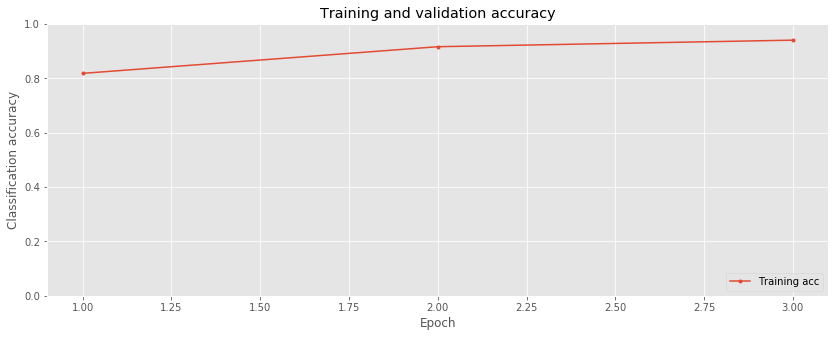

In [16]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
#val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
#val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
#plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [17]:
# View the first test data example sentence
# (invert the word index)
inv_imdb_word_index= {value: key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index > 2]


['ignore',
 'the',
 'bad',
 'reviews',
 'on',
 'here',
 'this',
 'film',
 'is',
 'awesome',
 'just',
 'before',
 'dawn',
 'is',
 'a',
 'great',
 'example',
 'of',
 'what',
 'can',
 'be',
 'done',
 'in',
 'a',
 'film',
 'with',
 'a',
 'minimal',
 'budget',
 'if',
 'you',
 'have',
 'a',
 'dedicated',
 'crew',
 'decent',
 'script',
 'and',
 'a',
 'cool',
 'idea',
 'for',
 'a',
 'film',
 "it's",
 'a',
 'hell',
 'of',
 'a',
 'lot',
 'of',
 'fun',
 'br',
 'br',
 'i',
 'enjoyed',
 'it',
 'a',
 'lot',
 'more',
 'than',
 'most',
 'other',
 "80's",
 'slashers',
 'because',
 'the',
 'killer',
 'is',
 'so',
 'unique',
 'wrong',
 'turn',
 'ripped',
 'this',
 'movie',
 'off',
 'something',
 'fierce',
 "there's",
 'plenty',
 'of',
 'blood',
 'and',
 'scares',
 'my',
 'girlfriend',
 'was',
 'freaked',
 'out',
 'and',
 'she',
 'watches',
 'almost',
 'everything',
 'with',
 'me',
 'and',
 "doesn't",
 "it's",
 'got',
 'that',
 'creepiness',
 'to',
 'it',
 'br',
 'br',
 "i'd",
 'say',
 'that',
 'just',
 '

In [18]:
# Get the model prediction using model.predict()
model.predict(x_test[None, 0, :])

array([[0.99494886]], dtype=float32)

In [19]:
# Get the corresponding label
y_test[0]

1

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [20]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [21]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

In [22]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [23]:
# Get the word index using get_imdb_word_index()
imdb_word_index = get_imdb_word_index()


#### Build stacked and bidirectional recurrent models

In [ ]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(imdb_word_index.values())
embedding_dim=16

In [24]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value, output_dim=embedding_dim, mask_zero = True),
    tf.keras.layers.LSTM(units=32, return_sequences=True),
    tf.keras.layers.LSTM(units=32, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


In [25]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value, output_dim=embedding_dim, mask_zero = True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8), merge_mode='sum'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [27]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value, output_dim=embedding_dim, mask_zero = True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8, return_sequences=True),merge_mode='concat'),
    tf.keras.layers.GRU(units=8, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#### Compile and fit the model

In [ ]:
# Compile the model

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train the model, saving its history

history = model.fit(x_train, y_train, epochs=3, batch_size= 32)

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);